# This Program takes digital payments and card transaction data into account and predicts if there would be a cyber attack:

## Prerequisites to Run this Program
   ### Version Required
        1. Sklearn: 0.22.1 (Latest version is required to display decision tree structure)
        2. Pandas: 0.25.3
        3. Numpy: 1.18.1
        4. Seaborn: 0.10.0
        5. Missingno: 0.4.1
        6. Matplotlib: 3.1.3
        7. Pandas Profiling: 2.3.0
        
    

In [31]:
# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sb
import missingno

# Machine Learning
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve,roc_curve,roc_auc_score
from sklearn.metrics import auc
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import linear_model,preprocessing
from sklearn import tree
from sklearn import svm

In [32]:
# Exploratory Data Analysis
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [33]:
#Display Top 5 rows
df.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [34]:
#Display Top 5 rows
df_test.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,CR_195453,01-FEB-18,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23
1,CR_103520,05-MAR-04,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,CR_196089,27-JAN-18,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,CR_112195,18-AUG-06,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,CR_149832,31-OCT-11,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43


In [35]:
#Print Schema
df.describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
count,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23674.000000,23856.000000,23856.000000,23856.000000,23856.000000
mean,0.483778,24.791206,24.637450,4.276744,2.455609,6.154175,4.876509,0.972460,4.924128,1.244802,206.954519,0.974064,85.237383,72.674296,33.464747,0.955231
std,1.439738,15.240231,15.135093,2.944672,1.963095,4.471756,3.881931,1.453144,1.362625,1.119301,93.033348,1.167725,27.597226,43.297320,8.386834,0.206800
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000,1.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000,1.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000,1.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,99.000000,6.000000,90.000000,332.000000,90.000000,116.000000,142.000000,50.000000,1.000000


In [36]:
#Print Schema
df_test.describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
count,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15776.000000,15903.000000,15903.000000,15903.000000
mean,0.468088,24.722631,24.575049,4.284223,2.448469,6.084890,4.862605,0.986732,4.908759,1.241212,206.954097,0.972236,85.191096,72.218575,33.422625
std,1.412112,15.228841,15.127451,2.974584,1.963372,4.451117,3.854550,1.471274,1.374677,0.841804,93.107783,0.876669,27.493192,43.438227,8.314284
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,50.000000,6.000000,40.000000,332.000000,40.000000,117.000000,142.000000,50.000000


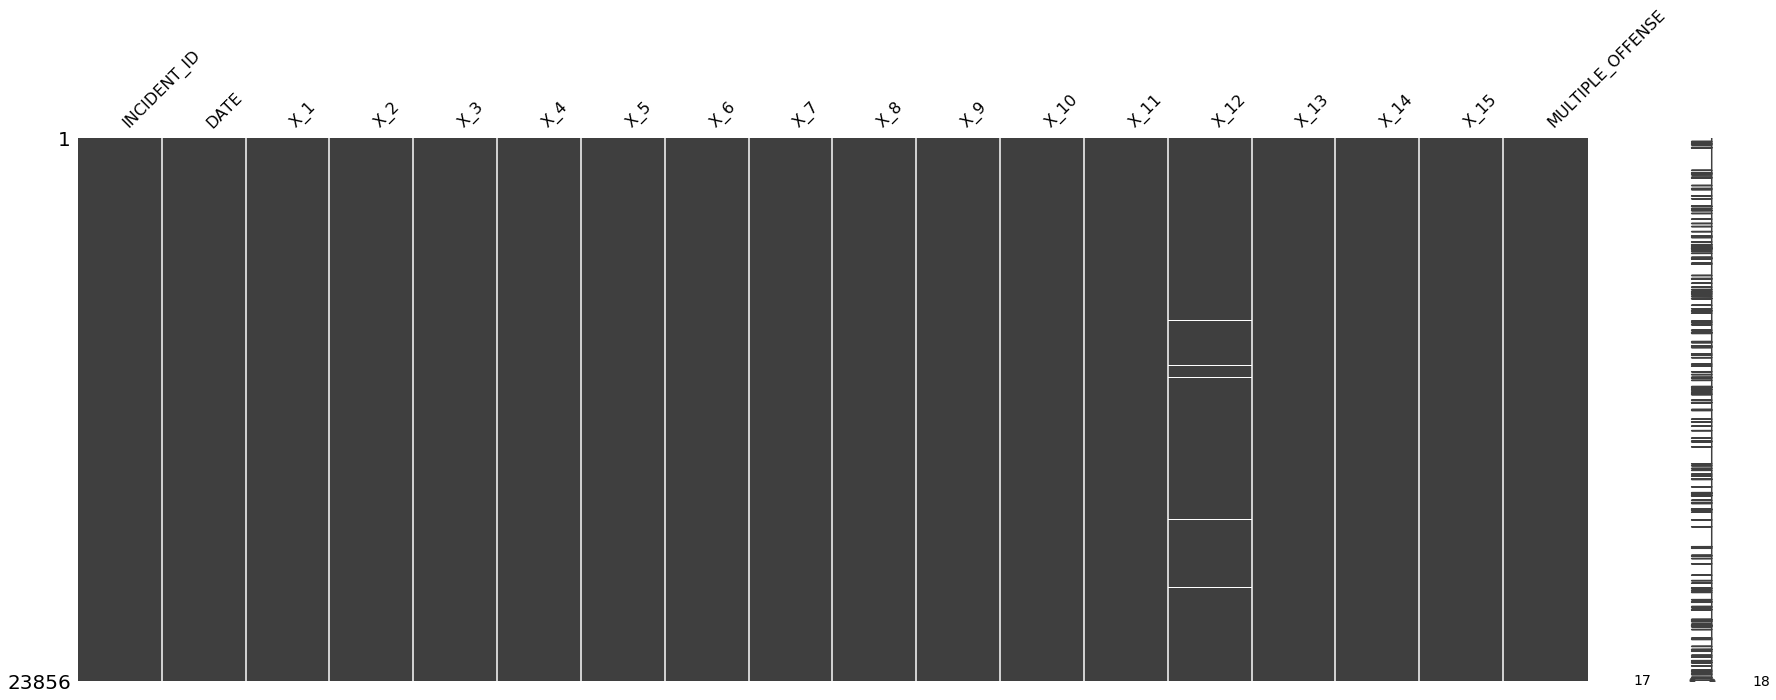

In [37]:
#Plot null data pattern in all columns
missingno.matrix(df, figsize = (30,10))

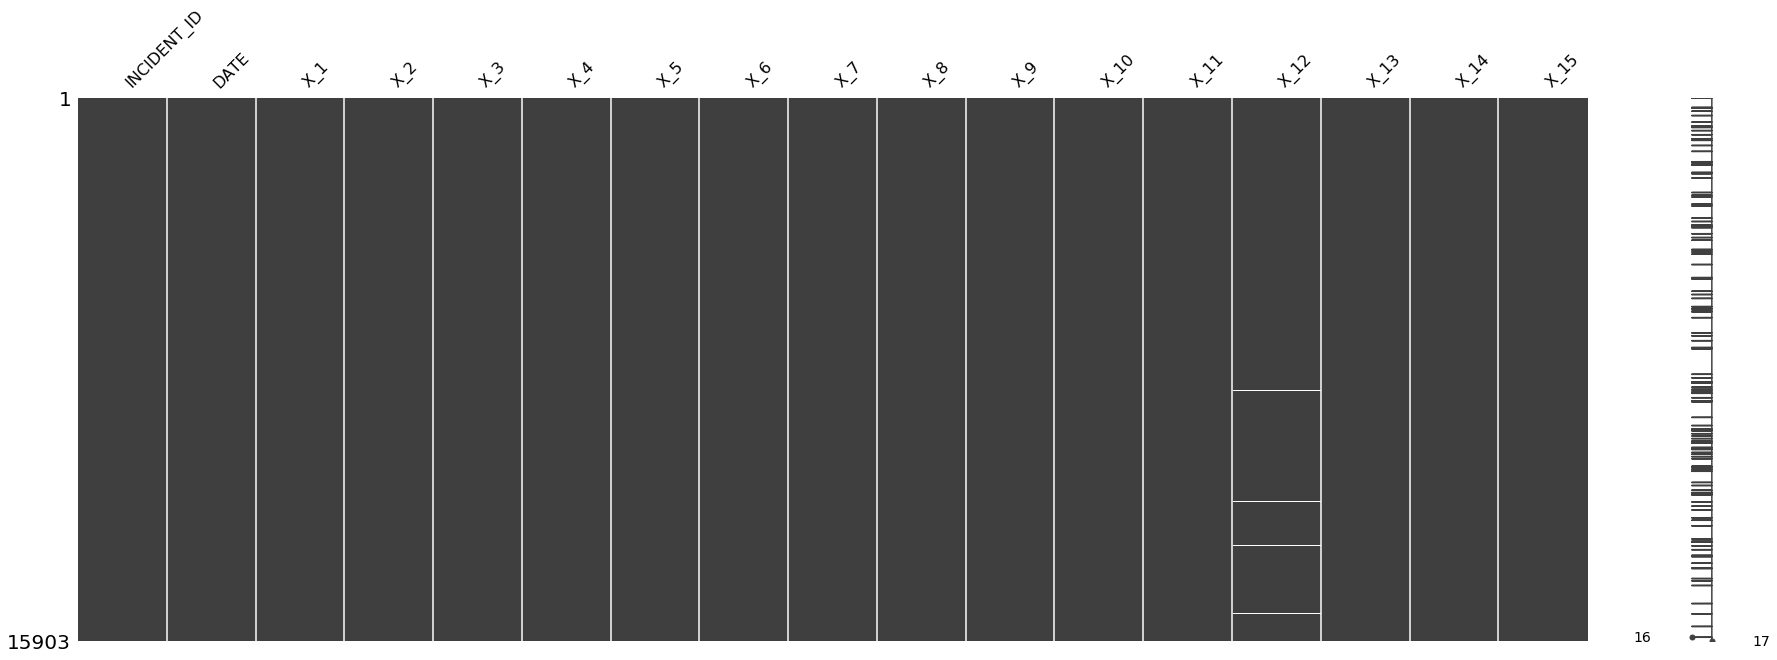

In [38]:
#Plot null data pattern in all columns
missingno.matrix(df_test, figsize = (30,10))

## Commented out Pandas profiling as it's computational heavy

In [39]:
#Pandas Profiling
#import pandas_profiling
#pandas_profiling.ProfileReport(df)

In [40]:
# Function to show missing values in each column

def find_missing_values(df, columns):
    """
    Finds number of rows where certain columns are missing values.
    ::param_df:: = target dataframe
    ::param_columns:: = list of columns
    """
    missing_vals = {}
    missing_vals_percentage={}
    df_length = len(df)
    for column in columns:
        total_column_values = df[column].value_counts().sum()
        missing_vals[column] = df_length-total_column_values
        missing_vals_percentage[column] = round((df_length-total_column_values)/df_length,2)*100
    return missing_vals,missing_vals_percentage


In [41]:
#Missing values in train dataset
print("Number of missing or NaN values for each column:")
missing_values,missing_vals_percentage = find_missing_values(df, columns=df.columns)
print(missing_values)
print("\nPercentage of missing or NaN values for each column:")
missing_vals_percentage

Number of missing or NaN values for each column:
{'INCIDENT_ID': 0, 'DATE': 0, 'X_1': 0, 'X_2': 0, 'X_3': 0, 'X_4': 0, 'X_5': 0, 'X_6': 0, 'X_7': 0, 'X_8': 0, 'X_9': 0, 'X_10': 0, 'X_11': 0, 'X_12': 182, 'X_13': 0, 'X_14': 0, 'X_15': 0, 'MULTIPLE_OFFENSE': 0}

Percentage of missing or NaN values for each column:


{'INCIDENT_ID': 0.0,
 'DATE': 0.0,
 'X_1': 0.0,
 'X_2': 0.0,
 'X_3': 0.0,
 'X_4': 0.0,
 'X_5': 0.0,
 'X_6': 0.0,
 'X_7': 0.0,
 'X_8': 0.0,
 'X_9': 0.0,
 'X_10': 0.0,
 'X_11': 0.0,
 'X_12': 1.0,
 'X_13': 0.0,
 'X_14': 0.0,
 'X_15': 0.0,
 'MULTIPLE_OFFENSE': 0.0}

In [42]:
#Missing values in test dataset
print("Number of missing or NaN values for each column:")
missing_values,missing_vals_percentage = find_missing_values(df_test, columns=df_test.columns)
print(missing_values)
print("\nPercentage of missing or NaN values for each column:")
missing_vals_percentage

Number of missing or NaN values for each column:
{'INCIDENT_ID': 0, 'DATE': 0, 'X_1': 0, 'X_2': 0, 'X_3': 0, 'X_4': 0, 'X_5': 0, 'X_6': 0, 'X_7': 0, 'X_8': 0, 'X_9': 0, 'X_10': 0, 'X_11': 0, 'X_12': 127, 'X_13': 0, 'X_14': 0, 'X_15': 0}

Percentage of missing or NaN values for each column:


{'INCIDENT_ID': 0.0,
 'DATE': 0.0,
 'X_1': 0.0,
 'X_2': 0.0,
 'X_3': 0.0,
 'X_4': 0.0,
 'X_5': 0.0,
 'X_6': 0.0,
 'X_7': 0.0,
 'X_8': 0.0,
 'X_9': 0.0,
 'X_10': 0.0,
 'X_11': 0.0,
 'X_12': 1.0,
 'X_13': 0.0,
 'X_14': 0.0,
 'X_15': 0.0}

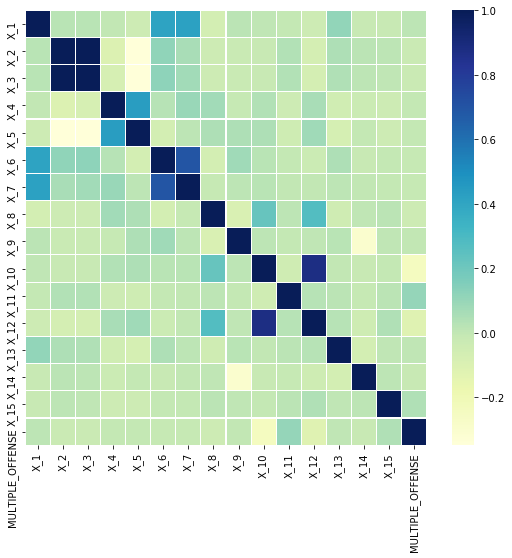

In [43]:
#Correlation Matrix
corrmat = df.corr() 

f, ax = plt.subplots(figsize =(9, 8)) 
sb.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 


In [44]:
# Load Data module
def LoadData(filename, yclasscol, cols, delim=",", normalize=True):
    y_class = [cols[yclasscol]]
    print ("y_class col=", y_class)
    features = cols[0:yclasscol]
    features += cols[yclasscol+1:]
    print ("features col=", features)
    
    df = pd.read_csv(filename, cols, delimiter=delim, delim_whitespace=False)
    df.fillna(value=0,inplace=True)
    x_df = df[features]
    y_df = df[y_class]
    x_data = np.array(pd.DataFrame(x_df, columns = features))
    y_data = np.array(pd.DataFrame(y_df, columns = y_class))
      

    #x_data_train, x_data_test, y_data_train, y_data_test = train_test_split(x_data, y_data, test_size=0.2, shuffle=False)
    print (x_data.shape)
    return x_data, y_data
if (__name__ == "__main__"):
    print ("Executing", __name__)
else:
    print ("Importing", __name__)


Executing __main__


In [45]:
# Choose the columns required for Classification
cols = ['X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7','X_8', 'X_9', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15','MULTIPLE_OFFENSE'
]
print (len(cols))
yclasscol = 15
fn = "train.csv"

# Fetching train data using LoadData module
x_train, y_train= \
    LoadData(fn, yclasscol=yclasscol, cols=cols, delim=",", normalize=True)
print(x_train,y_train)


16
y_class col= ['MULTIPLE_OFFENSE']
features col= ['X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15']
(23856, 15)
[[  0.  36.  34. ...  92.  29.  36.]
 [  1.  37.  37. ... 103. 142.  34.]
 [  0.   3.   2. ... 110.  93.  34.]
 ...
 [  0.  25.  25. ...  10.  29.  18.]
 [  0.  39.  39. ... 112. 103.  43.]
 [  7.  36.  34. ...  92.  29.  34.]] [[0]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]


In [46]:
# Fetching Test data

cols = ['X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7','X_8', 'X_9', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15']
df_test = pd.read_csv('test.csv', cols, delimiter=",", delim_whitespace=False)
df_test.fillna(value=0,inplace=True)
x_df = df_test[cols]
x_test = np.array(pd.DataFrame(x_df, columns = cols))
print(x_test.shape)
print(x_test)

(15903, 15)
[[  0.  30.  35. ...  72. 119.  23.]
 [  0.  44.  44. ...  12.  29.  34.]
 [  0.  34.  33. ...  72.   0.  34.]
 ...
 [  0.  26.  27. ...  72.  62.  34.]
 [  0.  21.  23. ...  92.  62.  34.]
 [  0.   4.   4. ...  72.  29.  34.]]


In [47]:
# UNIVARIATE ANALYSIS: WHICH FEATURE IMPACTS THE OUTPUT THE MOST, and then select the top
# Find variables that are most likely to impact output:
test = SelectKBest(score_func=f_classif, k=7)
fit = test.fit(x_train, y_train)
newcols = test.get_support(indices=True)
for i in range(14):
    print ("Feature = ",cols[i], ", Univariate Score", fit.scores_[i])

Feature =  X_1 , Univariate Score 4.698823938489447
Feature =  X_2 , Univariate Score 17.782548921588532
Feature =  X_3 , Univariate Score 17.68431043789921
Feature =  X_4 , Univariate Score 0.20357945469667568
Feature =  X_5 , Univariate Score 0.2839072719089838
Feature =  X_6 , Univariate Score 1.4899516397872348
Feature =  X_7 , Univariate Score 1.5404436858136956
Feature =  X_8 , Univariate Score 26.635718540328327
Feature =  X_9 , Univariate Score 0.013362591163396659
Feature =  X_10 , Univariate Score 1491.6588001990704
Feature =  X_11 , Univariate Score 266.3726623143168
Feature =  X_12 , Univariate Score 314.7674579299241
Feature =  X_13 , Univariate Score 1.0115122091796753
Feature =  X_14 , Univariate Score 5.560877873944067


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# DECISION TREES

In [48]:
# Using a DECISION TREE CLASSIFIER for Fraud detetction
dtmodel = DecisionTreeClassifier(criterion = "gini", splitter = "best")
dtmodel.fit(x_train, y_train)
y_pred_test = dtmodel.predict(x_test)
y_pred_train = dtmodel.predict(x_train)

print ("Train data accuracy", accuracy_score(y_train, y_pred_train))
print ("Train Data score", dtmodel.score(x_train, y_train))
print ("Train Data recall score", recall_score(y_train,y_pred_train))

cm_train = confusion_matrix(y_pred_train, y_train)
print ("\nTrain data Confusion Matrix\n", cm_train)


Train data accuracy 1.0
Train Data score 1.0
Train Data recall score 1.0

Train data Confusion Matrix
 [[ 1068     0]
 [    0 22788]]


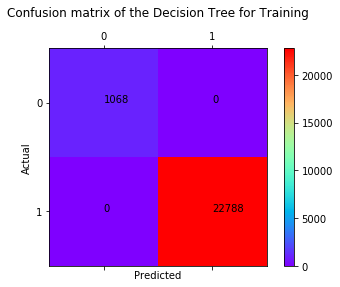

In [49]:
# Confusion matrix of the Decision Tree
import matplotlib.pyplot as plt
%matplotlib inline  

def doPlot(cm, labels, tit):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    c = ax.matshow(cm, cmap=plt.cm.rainbow)
    plt.title('Confusion matrix of the Decision Tree for ' + tit +'\n')
    fig.colorbar(c)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    s = [['TP','FN'], ['FP', 'TN']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(cm[i][j]))
    plt.show()
    
doPlot(cm_train, ["0","1"], "Training")


## Write Prediction to Output file

In [50]:
#Write output to Predictions file

df_test['MULTIPLE_OFFENSE']=y_pred_test
cols=['INCIDENT_ID','MULTIPLE_OFFENSE']
df_test[cols].to_csv('predictions_decisiontree.csv',header=True,index=None)

## Display decision tree
### <span style="color:green"> Sklearn package needs to be updated to version 0.22.1 for this to work. </span> 

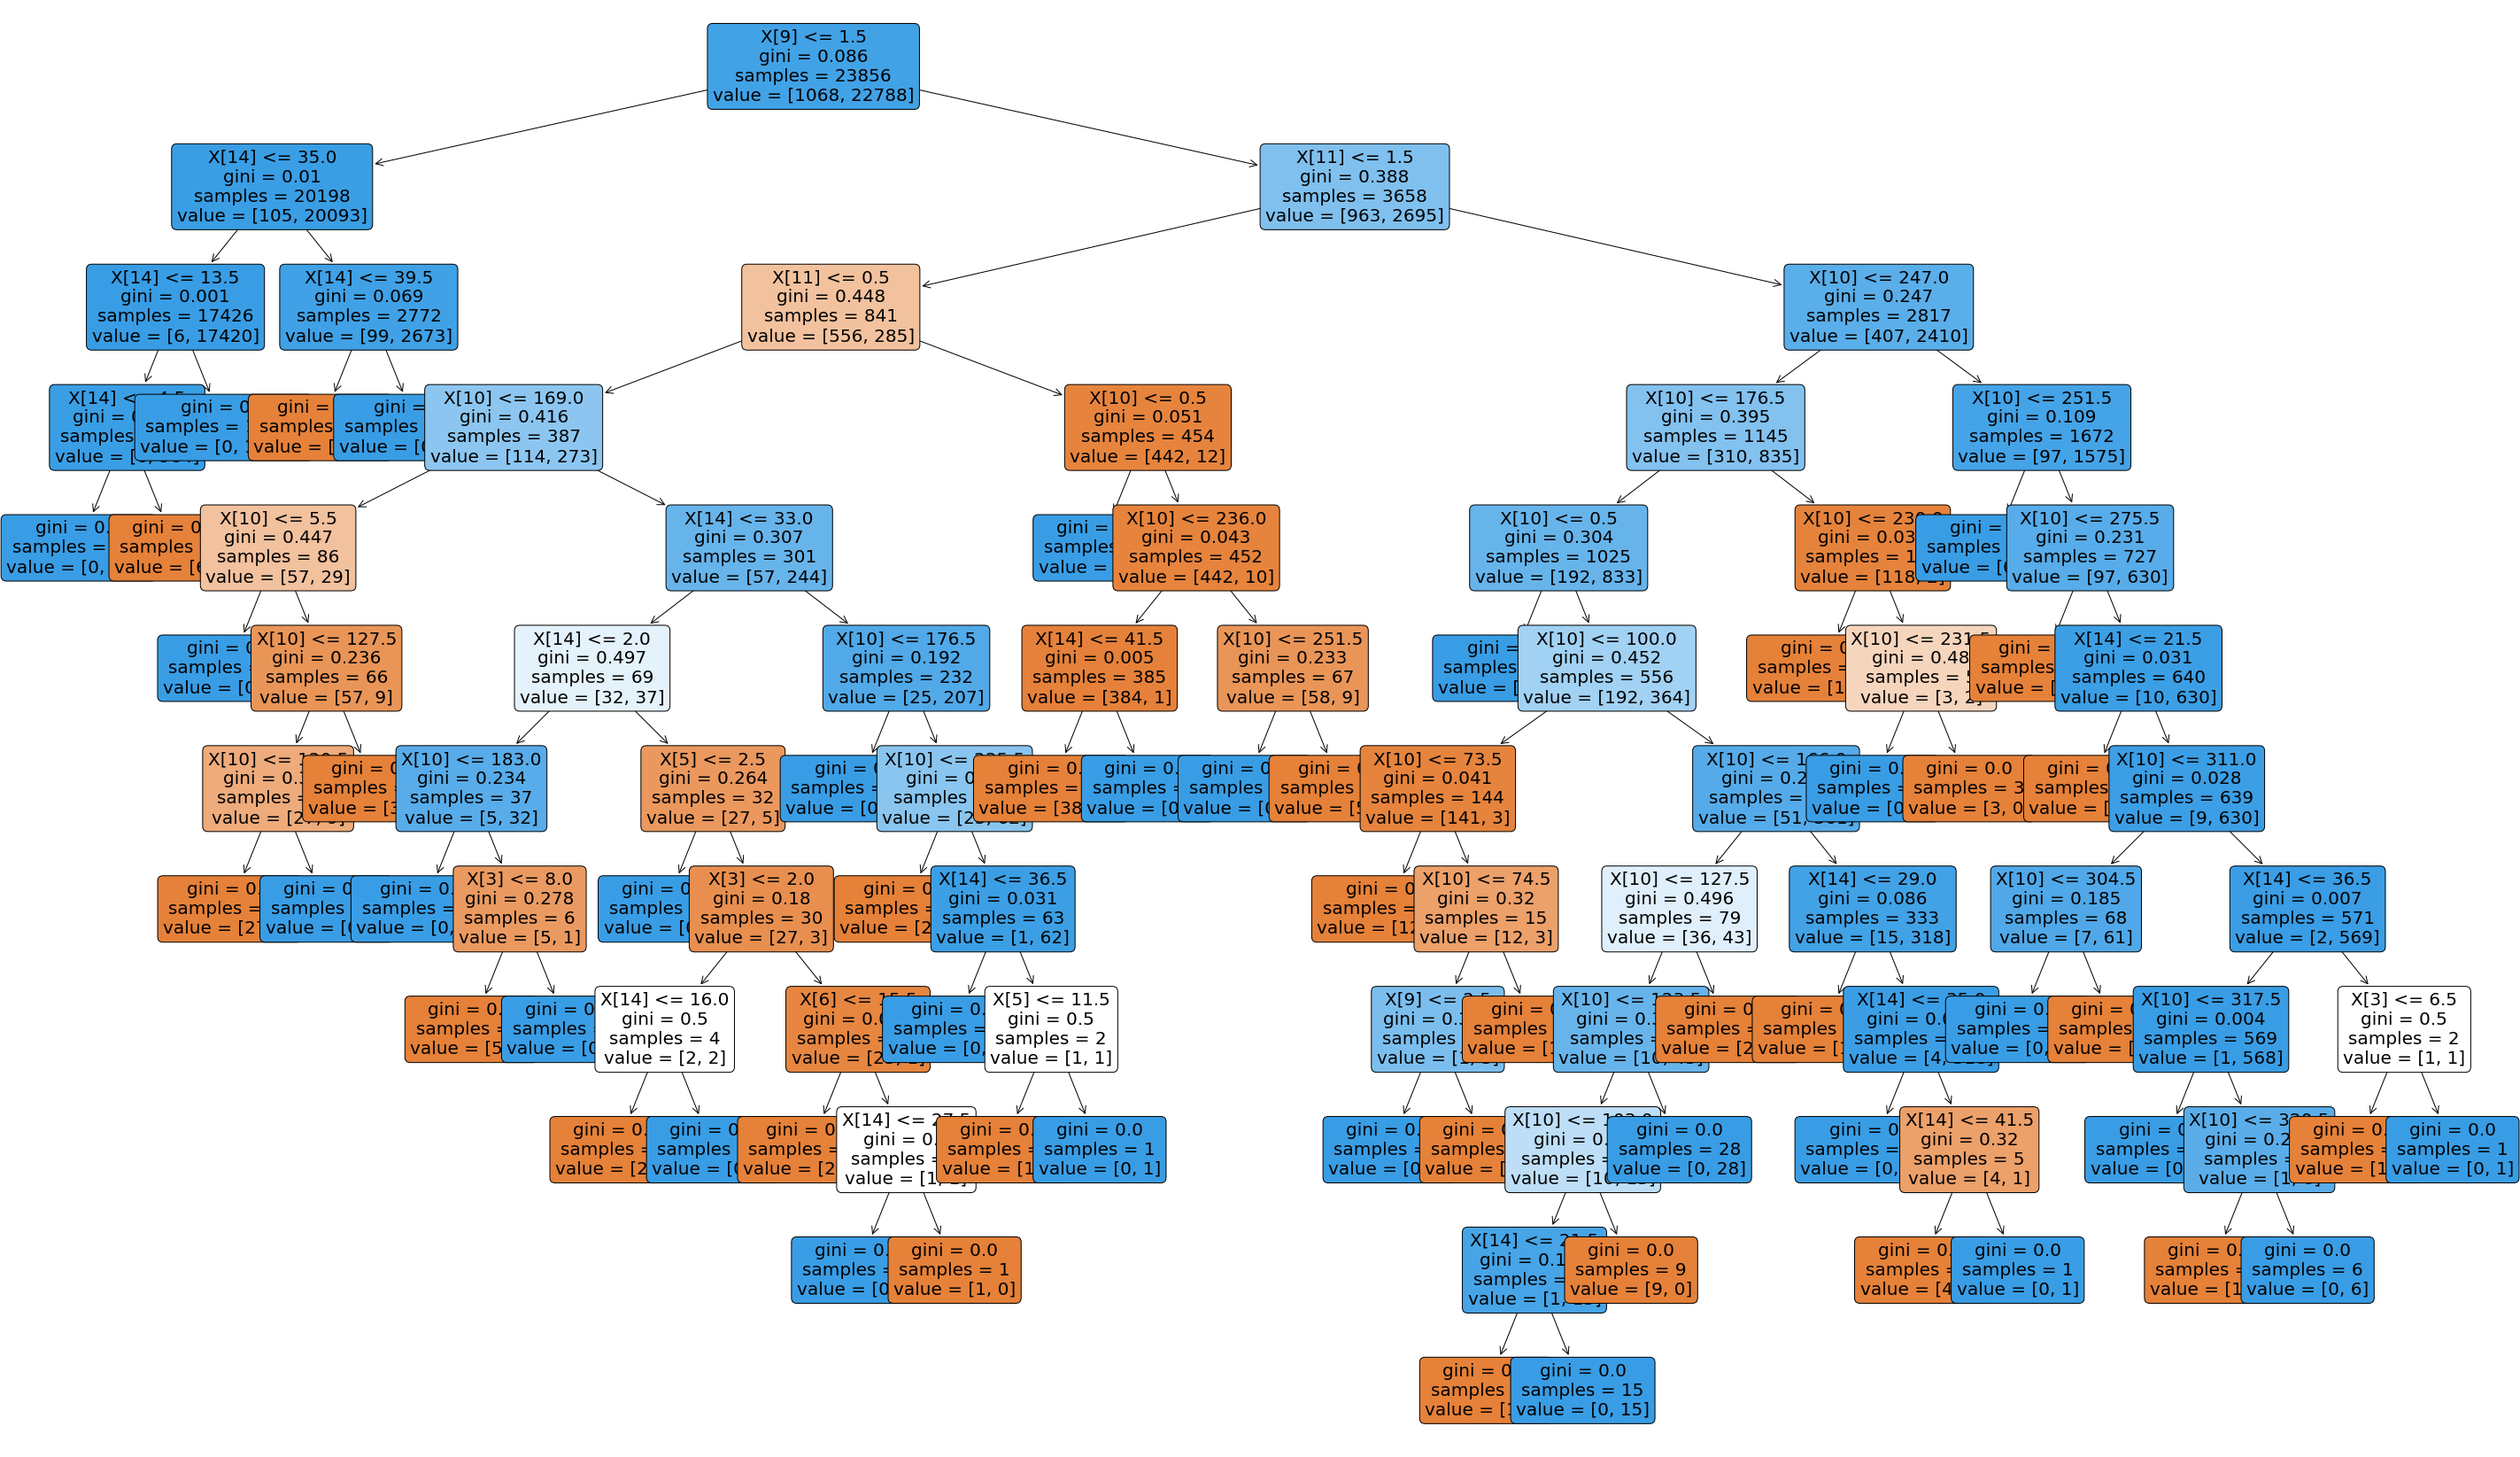

In [51]:
#Display Decision Tree Structure
plt.figure(figsize=[50,30])
tree.plot_tree(dtmodel,fontsize=20, filled=True, rounded=True)
plt.show()

# LOGISTIC REGRESSION

In [52]:
# Using LOGISTIC REGRESSION for Fraud detetction
lrmodel = LogisticRegression(fit_intercept = True, C = 1e16,  solver = "newton-cg", max_iter=100)
lrmodel.fit(x_train, y_train)
y_pred_test = lrmodel.predict(x_test)
y_pred_train = lrmodel.predict(x_train)
#print ("Test data accuracy", accuracy_score(y_test, y_pred_test))
print ("Train data accuracy", accuracy_score(y_train, y_pred_train))
print ("Train Data score", lrmodel.score(x_train, y_train))

cm_train = confusion_matrix(y_pred_train, y_train)
print ("\nTrain data Confusion Matrix\n", cm_train)



/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train data accuracy 0.9560697518443997
Train Data score 0.9560697518443997

Train data Confusion Matrix
 [[  102    82]
 [  966 22706]]


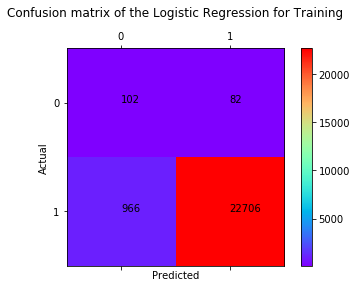

In [53]:
# Confusion matrix of the Logistic Regression
import matplotlib.pyplot as plt
%matplotlib inline  

def doPlot(cm, labels, tit):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    c = ax.matshow(cm, cmap=plt.cm.rainbow)
    plt.title('Confusion matrix of the Logistic Regression for ' + tit +'\n')
    fig.colorbar(c)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    s = [['TP','FN'], ['FP', 'TN']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(cm[i][j]))
    plt.show()
    
doPlot(cm_train, ["0","1"], "Training")


# RANDOM FOREST

In [54]:
# Using RANDOM FOREST CLASSIFIER for Fraud detetction
rfmodel = RandomForestClassifier(n_estimators = 21, random_state = 21)
rfmodel.fit(x_train, y_train)
y_pred_test = rfmodel.predict(x_test)
y_pred_train = rfmodel.predict(x_train)

print ("Train data accuracy", accuracy_score(y_train, y_pred_train))
print ("Train Data score", rfmodel.score(x_train, y_train))
#print("Area under the curve", auc(x_test, y_test))

cm_train = confusion_matrix(y_pred_train, y_train)

print ("\nTrain data Confusion Matrix\n", cm_train)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Train data accuracy 0.999958081824279
Train Data score 0.999958081824279

Train data Confusion Matrix
 [[ 1067     0]
 [    1 22788]]


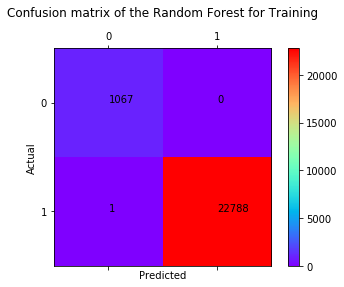

In [55]:
# Confusion matrix of the RANDOM FOREST CLASSIFIER
import matplotlib.pyplot as plt
%matplotlib inline  

def doPlot(cm, labels, tit):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    c = ax.matshow(cm, cmap=plt.cm.rainbow)
    plt.title('Confusion matrix of the Random Forest for ' + tit +'\n')
    fig.colorbar(c)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    s = [['TP','FN'], ['FP', 'TN']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(cm[i][j]))
    plt.show()
    
doPlot(cm_train, ["0","1"], "Training")


In [56]:
#Write output to Predictions file

df_test['MULTIPLE_OFFENSE']=y_pred_test
cols=['INCIDENT_ID','MULTIPLE_OFFENSE']
df_test[cols].to_csv('predictions_randomforest.csv',header=True,index=None)

## Display a sample tree in Random Forest
### <span style="color:green"> Sklearn package needs to be updated to version 0.22.1 for this to work. </span> 

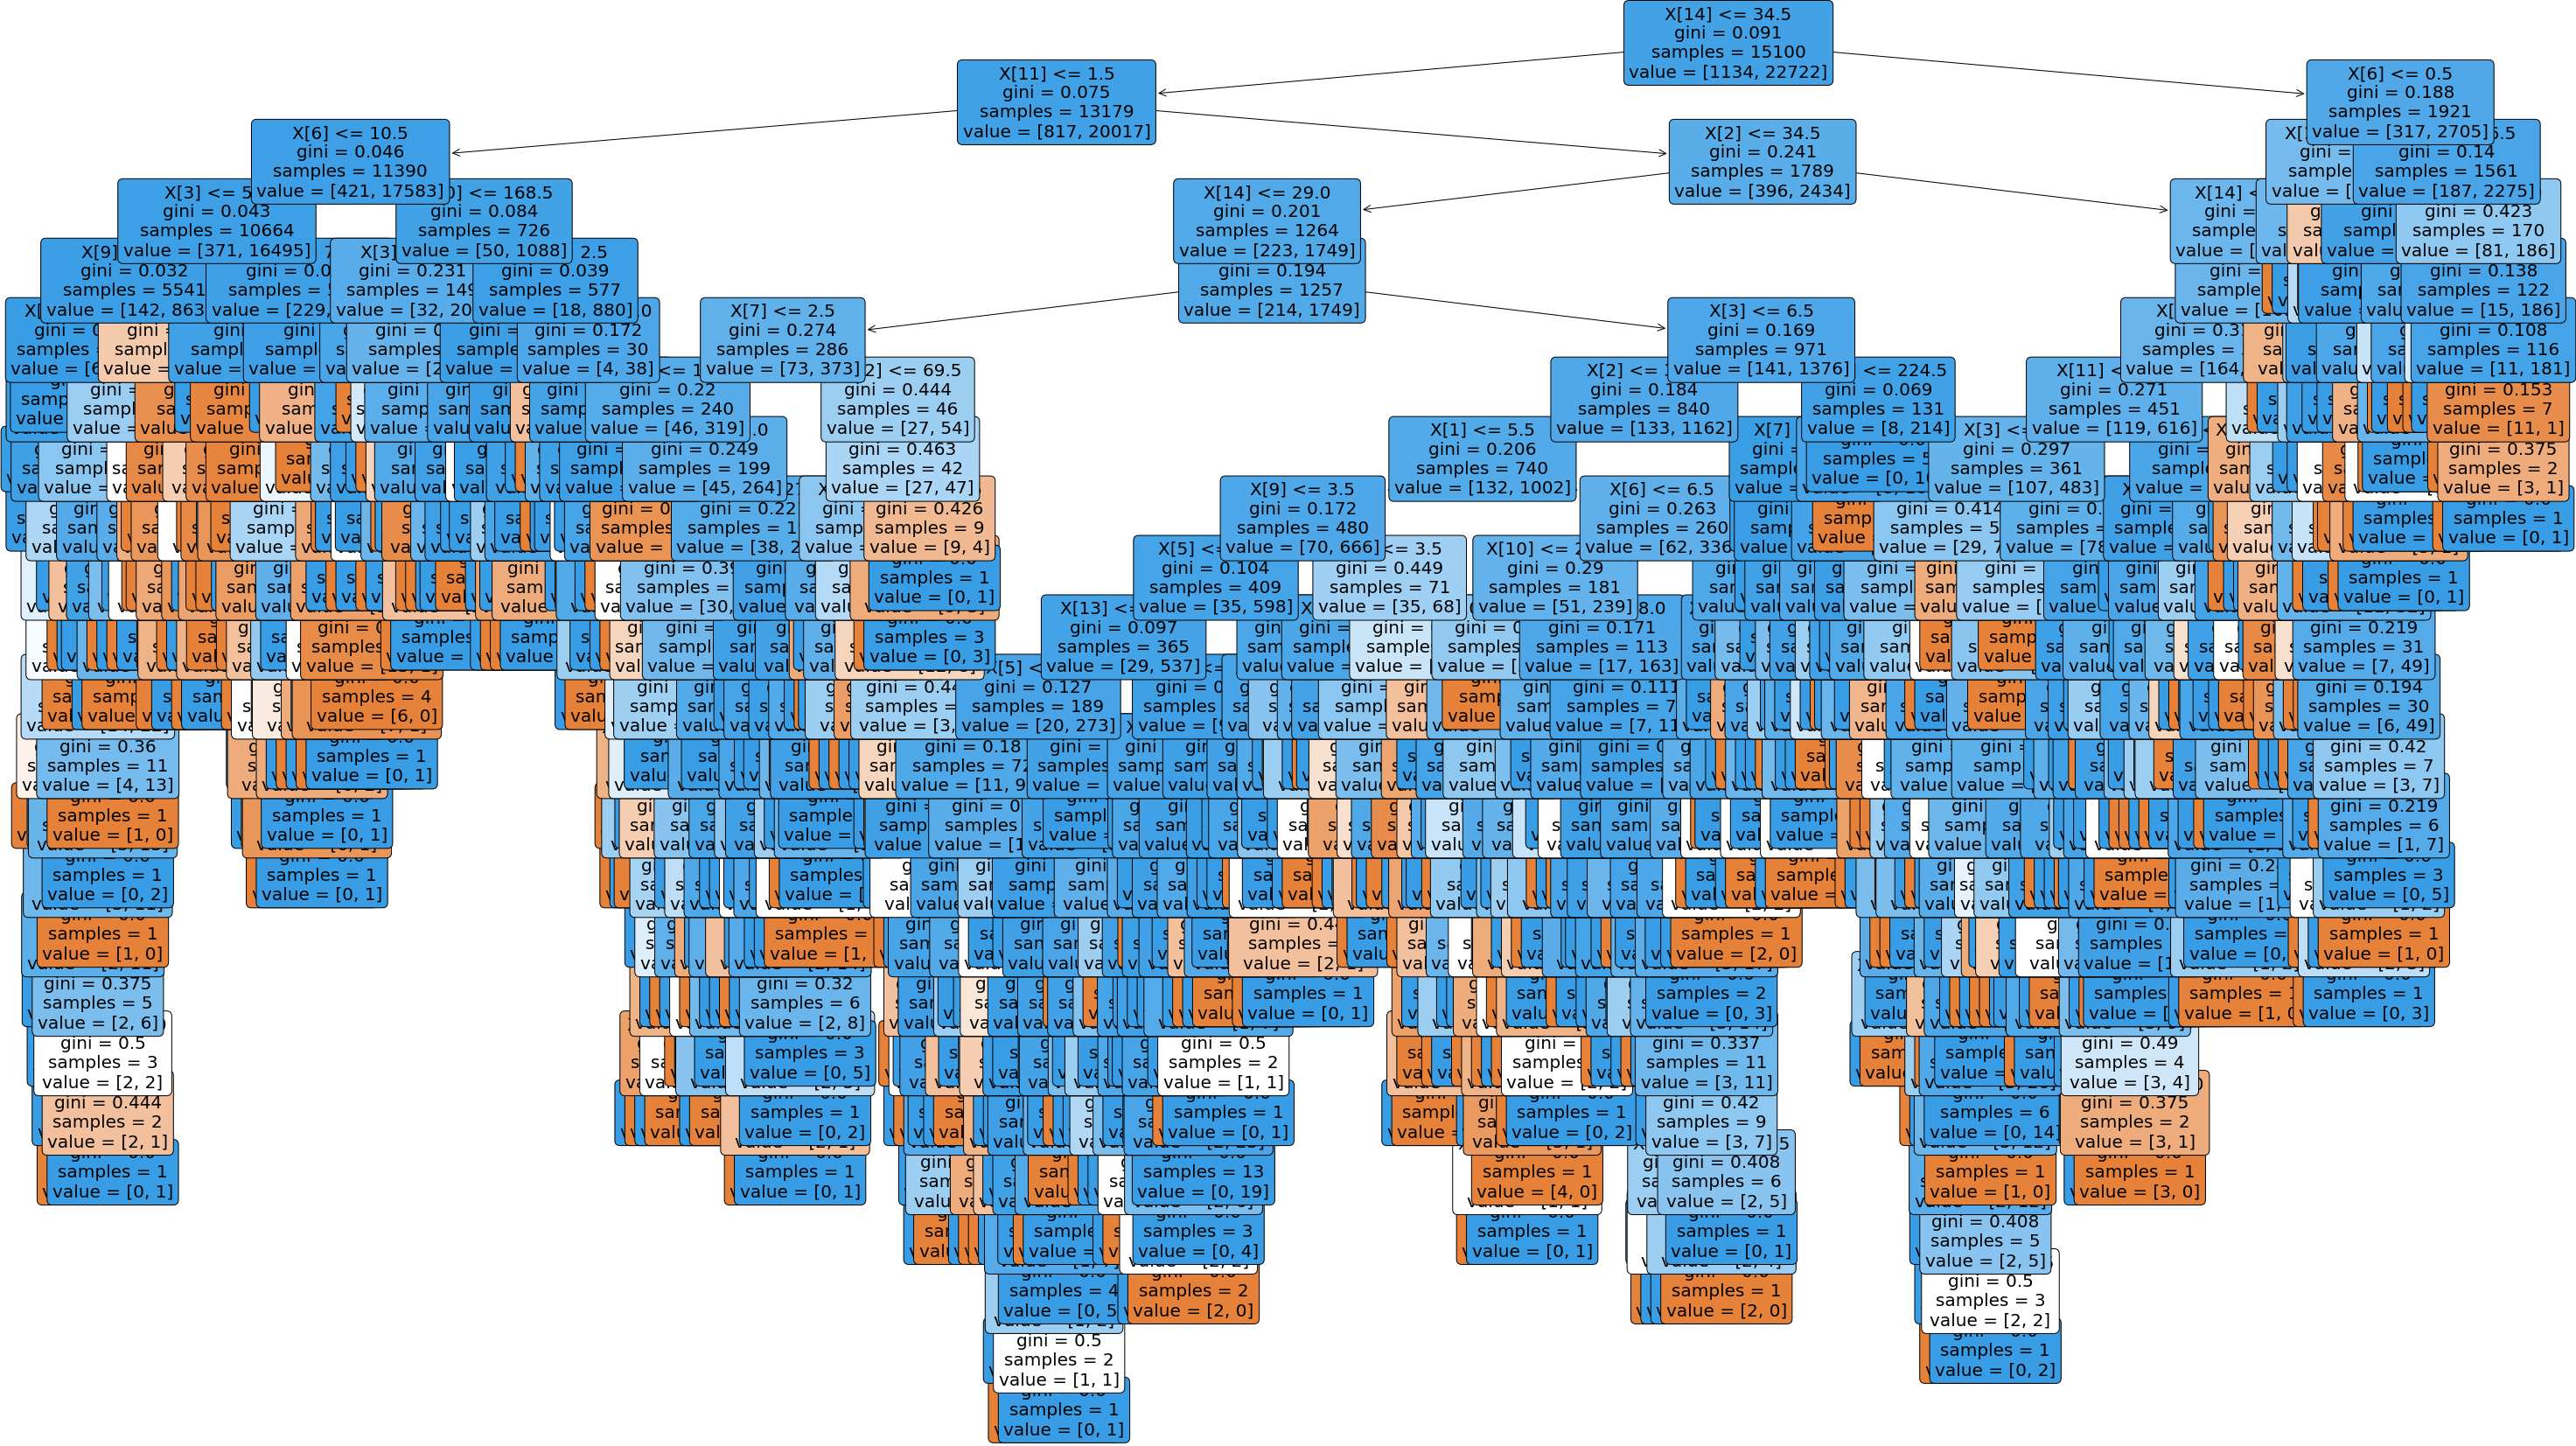

In [26]:
#Display a sample tree Structure in Random Forest
estimator = rfmodel.estimators_[5]
plt.figure(figsize=[50,30])
tree.plot_tree(estimator,fontsize=20, filled=True, rounded=True)
plt.show()

# NAIVE BAYES

In [27]:
# Using NAIVE BAYES for Fraud detetction
nbmodel = GaussianNB()
nbmodel.fit(x_train, y_train)
y_pred_test = nbmodel.predict(x_test)
y_pred_train = nbmodel.predict(x_train)

print ("Train data accuracy", accuracy_score(y_train, y_pred_train))
print ("Train Data score", nbmodel.score(x_train, y_train))
#print("Area under the curve", auc(x_test, y_test))

cm_train = confusion_matrix(y_pred_train, y_train)

print ("\nTrain data Confusion Matrix\n", cm_train)


Train data accuracy 0.9461351441985245
Train Data score 0.9461351441985245

Train data Confusion Matrix
 [[  138   355]
 [  930 22433]]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


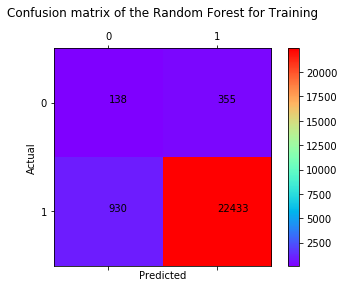

In [28]:
# Confusion matrix of the Naive Bayes Model
import matplotlib.pyplot as plt
%matplotlib inline  

def doPlot(cm, labels, tit):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    c = ax.matshow(cm, cmap=plt.cm.rainbow)
    plt.title('Confusion matrix of the Random Forest for ' + tit +'\n')
    fig.colorbar(c)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    s = [['TP','FN'], ['FP', 'TN']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(cm[i][j]))
    plt.show()
    
doPlot(cm_train, ["0","1"], "Training")


## End of Code